In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [2]:
path = "/kaggle/input/data-inflation/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_130173.csv"

# Skip metadata rows
df_raw = pd.read_csv(path, skiprows=4)

# Clean and reshape data
df = df_raw.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                 var_name='Year', value_name='Inflation_Rate')

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Inflation_Rate'])
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Inflation_Rate
13,Australia,AUS,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960.0,3.728814
14,Austria,AUT,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960.0,1.945749
17,Belgium,BEL,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960.0,0.299467
35,Canada,CAN,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960.0,1.358696
37,Switzerland,CHE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1960.0,1.438795


In [4]:

countries = ['United States', 'China', 'India', 'Germany', 'Brazil', 'South Africa']
inflation_select = df[df['Country Name'].isin(countries)]



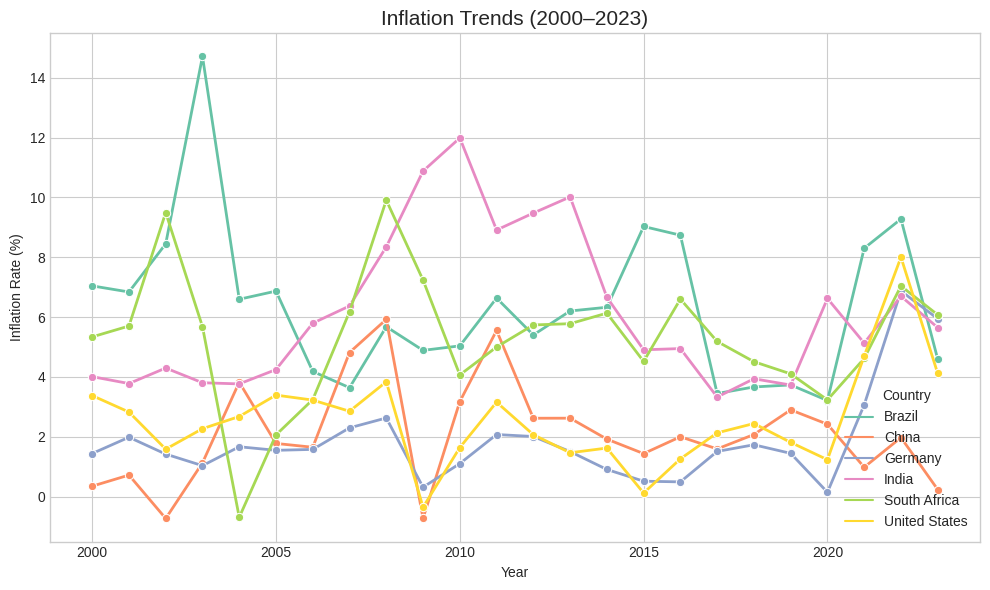

In [13]:
# Clean the slice first
countries = ['United States', 'China', 'India', 'Germany', 'Brazil', 'South Africa']

inflation_select_fix = (
    df[df['Country Name'].isin(countries)]
      .dropna(subset=['Year', 'Inflation_Rate'])
      .assign(Year=lambda d: d['Year'].astype(int))
      .query("Year >= 2000 and Year <= 2023")
      .sort_values(['Country Name', 'Year'])
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=inflation_select_fix,
    x='Year',
    y='Inflation_Rate',
    hue='Country Name',
    estimator=None,      # plot raw lines per country, no aggregation
    errorbar=None,       # turn off CIs
    linewidth=2,
    marker='o'
)
plt.title('Inflation Trends (2000–2023)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(title='Country', loc='lower right')
plt.tight_layout()
plt.show()

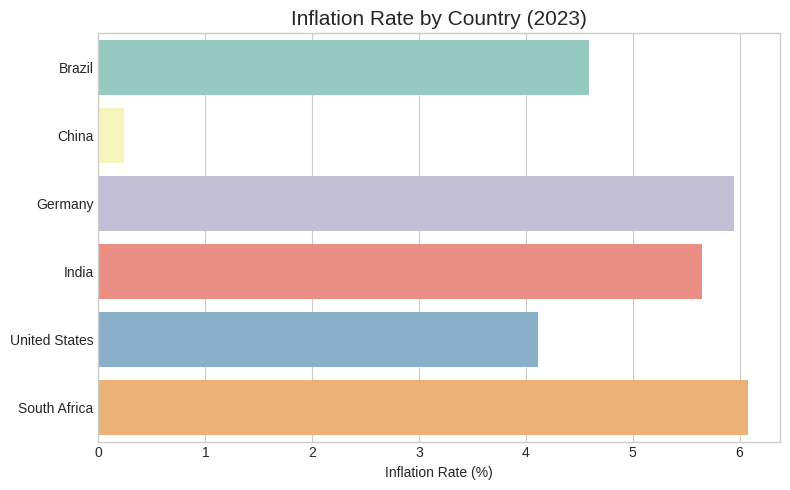

In [6]:
inflation_2023 = inflation_select[inflation_select['Year'] == 2023]

plt.figure(figsize=(8,5))
sns.barplot(data=inflation_2023, x='Inflation_Rate', y='Country Name', palette='Set3')
plt.title('Inflation Rate by Country (2023)', fontsize=15)
plt.xlabel('Inflation Rate (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()

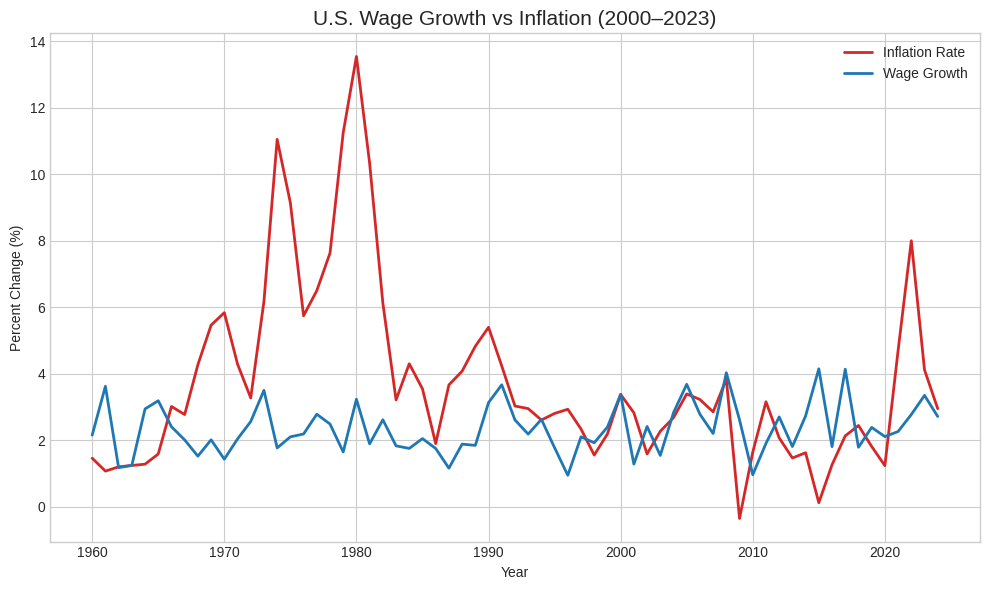

In [7]:
us = df[df['Country Name'] == 'United States']
wage_growth = np.random.normal(2.5, 1, len(us))  # mock wage growth data

plt.figure(figsize=(10,6))
plt.plot(us['Year'], us['Inflation_Rate'], label='Inflation Rate', color='#d62728', linewidth=2)
plt.plot(us['Year'], wage_growth, label='Wage Growth', color='#1f77b4', linewidth=2)
plt.title('U.S. Wage Growth vs Inflation (2000–2023)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
inflation_map = df[df['Year'] == 2023]

fig = px.choropleth(inflation_map,
                    locations='Country Code',
                    color='Inflation_Rate',
                    hover_name='Country Name',
                    color_continuous_scale='RdYlBu_r',
                    title='Global Inflation Rates (2023)')
fig.show()

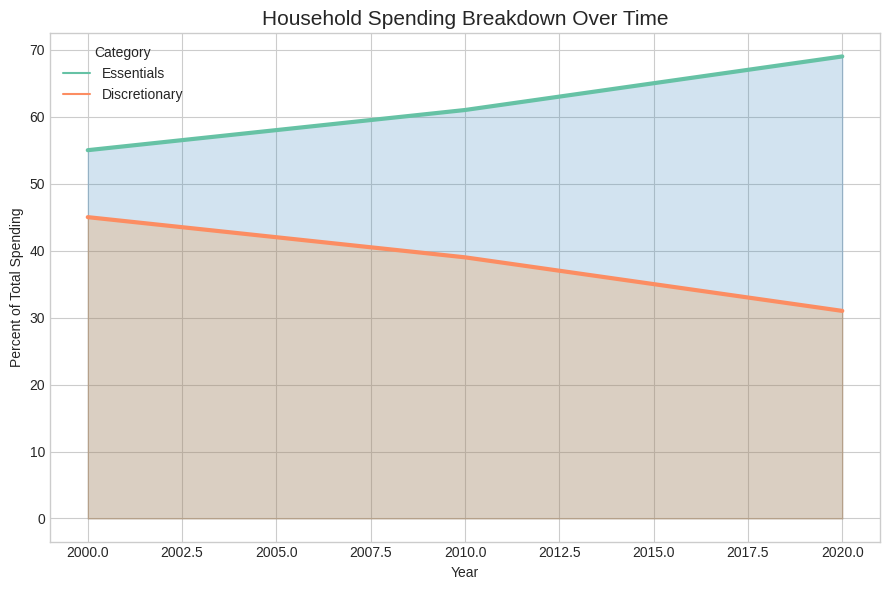

In [10]:
years = np.arange(2000, 2025, 5)
data = pd.DataFrame({
    'Year': years,
    'Essentials': [55, 58, 61, 65, 69],
    'Discretionary': [45, 42, 39, 35, 31]
})
data = data.melt('Year', var_name='Category', value_name='Percent')

plt.figure(figsize=(9,6))
sns.lineplot(data=data, x='Year', y='Percent', hue='Category', linewidth=3)
plt.fill_between(data[data['Category']=='Essentials']['Year'],
                 data[data['Category']=='Essentials']['Percent'],
                 alpha=0.2, color='#1f77b4')
plt.fill_between(data[data['Category']=='Discretionary']['Year'],
                 data[data['Category']=='Discretionary']['Percent'],
                 alpha=0.2, color='#ff7f0e')
plt.title('Household Spending Breakdown Over Time', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Percent of Total Spending')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

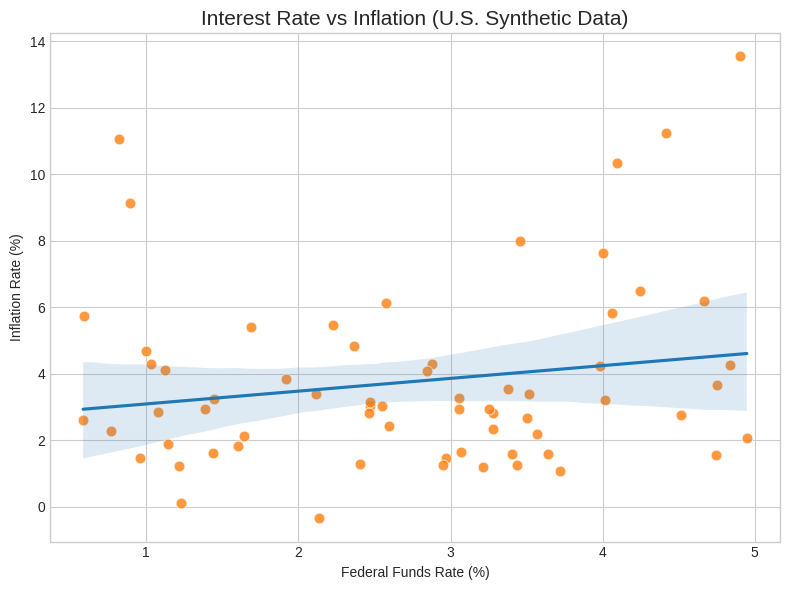

In [11]:
# Mock interest rate data for demonstration
np.random.seed(0)
interest = np.random.uniform(0.5, 5.0, len(us))
plt.figure(figsize=(8,6))
sns.scatterplot(x=interest, y=us['Inflation_Rate'], color='#ff7f0e', s=60, alpha=0.8)
sns.regplot(x=interest, y=us['Inflation_Rate'], scatter=False, color='#1f77b4')
plt.title('Interest Rate vs Inflation (U.S. Synthetic Data)', fontsize=15)
plt.xlabel('Federal Funds Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.tight_layout()
plt.show()

In [12]:
inflation_select.to_csv("/kaggle/working/cleaned_inflation_data.csv", index=False)
print("✅ Cleaned data saved as 'cleaned_inflation_data.csv'")

✅ Cleaned data saved as 'cleaned_inflation_data.csv'
